<a href="https://colab.research.google.com/github/yeonhas/study_2023/blob/main/AI/Ai_ch10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 판다스 라이브러리를 사용해 데이터 읽고 numpy 배열로 변환
import pandas as pd
import numpy as np
data = pd.read_csv('./sample_data/mnist_train_small.csv', header=None)
data = np.array(data)

In [ ]:
y_train = data[:,1:]
x_train = data[:,0]
y_train = y_train.reshape(-1,28,28)

5

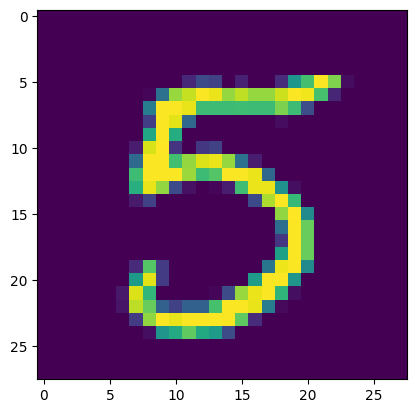

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(y_train[1,:,:])
x_train[1]

In [ ]:
import tensorflow.keras as keras

x_train = keras.utils.to_categorical(x_train)
y_train = y_train/255

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

model = Sequential()
model.add(layers.Dense(units=3136, input_shape=(10,),activation='relu'))
model.add(layers.Reshape((7,7,64)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=1, kernel_size=3, padding='same', activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer = optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3136)              34496     
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        9232      
                                                                 
 up_sampling2d_3 (UpSampling  (None, 28, 28, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)       

In [ ]:
hist = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.3)

Epoch 1/10
219/219 [==============================] - 77s 349ms/step - loss: 0.0597 - accuracy: 0.7928 - val_loss: 0.0553 - val_accuracy: 0.8003
Epoch 2/10
219/219 [==============================] - 55s 251ms/step - loss: 0.0542 - accuracy: 0.7916 - val_loss: 0.0536 - val_accuracy: 0.7955
Epoch 3/10
219/219 [==============================] - 54s 247ms/step - loss: 0.0540 - accuracy: 0.7923 - val_loss: 0.0534 - val_accuracy: 0.7963
Epoch 4/10
219/219 [==============================] - 55s 253ms/step - loss: 0.0538 - accuracy: 0.7927 - val_loss: 0.0535 - val_accuracy: 0.7962
Epoch 5/10
219/219 [==============================] - 62s 282ms/step - loss: 0.0538 - accuracy: 0.7929 - val_loss: 0.0534 - val_accuracy: 0.7962
Epoch 6/10
219/219 [==============================] - 57s 263ms/step - loss: 0.0537 - accuracy: 0.7931 - val_loss: 0.0534 - val_accuracy: 0.7929
Epoch 7/10
219/219 [==============================] - 55s 250ms/step - loss: 0.0537 - accuracy: 0.7932 - val_loss: 0.0534 - val_ac

In [ ]:
test_d = np.zeros((1,10))
test_d[0,4] = 1
o = model.predict(test_d)

1/1 [==============================] - 0s 121ms/step


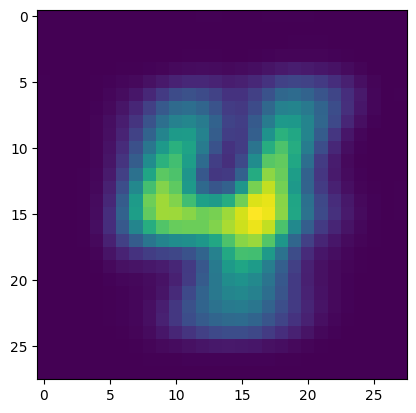

In [ ]:
im = o.reshape((28,28))
plt.imshow(im)

In [ ]:
test_d = np.zeros((1,10))
test_d[0,8] = 1
o = model.predict(test_d)

1/1 [==============================] - 0s 23ms/step


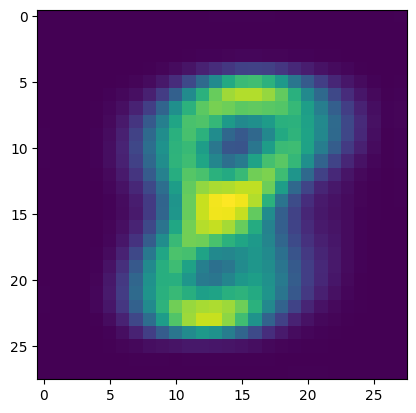

In [ ]:
im = o.reshape((28,28))
plt.imshow(im)